## Comparing the clean and incremental build time of a system on its different configurations

In [5]:
import pandas as pd
import numpy as np

# Will show the clean build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/'
#path = '/src/data/'
df1 = pd.read_csv(path + 'clean-bt.csv', converters={'BranchC': lambda x: str(x)})
df2 = pd.read_csv(path + 'incremental-bt.csv', converters={'Br2': lambda x: str(x)})

df1 = df1.rename(columns = {"BranchC": "Branch", "Build Time": "Clean Build Time"})
df2 = df2.rename(columns = {"Br2": "Branch", 
                            "max": "Max Inc. Build Time", 
                            "mean": "Mean Inc. Build Time",
                            "min": "Min Inc. Build Time"})
df3 = pd.merge(df1, df2) 
df3.round(decimals=2)


,Branch,Clean Build Time,Binary Size,Max Inc. Build Time,Mean Inc. Build Time,Min Inc. Build Time
0,00001,37.77,1913968,38.16,37.81,37.63
1,00002,38.19,1938720,39.58,38.28,38.08
2,00003,34.42,2278824,36.05,34.51,34.29
3,00004,69.69,3047312,71.92,69.92,69.63
4,00005,37.94,2442528,39.12,38.05,37.85
5,00006,65.80,2845544,67.80,65.83,65.56
6,00007,21.20,1601416,22.67,21.36,21.20
7,00008,20.74,1657760,21.22,20.73,20.64
8,00009,66.10,2836352,66.24,65.93,65.76
9,00010,32.03,1749400,32.75,32.17,31.99


In [6]:
df2['Time Diff. %'] = (1 - (df2['Min Inc. Build Time'] / df1['Clean Build Time'])) * 100
df4 = pd.merge(df1[["Branch", "Clean Build Time"]], 
                df2[["Branch", "Min Inc. Build Time", "Time Diff. %"]]) 
df4 = df4.round(decimals=2).sort_values(by = "Time Diff. %", ascending=False)

df4

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
15,00016,18.56,18.43,0.70
8,00009,66.10,65.76,0.52
17,00018,19.07,18.98,0.48
7,00008,20.74,20.64,0.45
19,00020,37.53,37.39,0.37
2,00003,34.42,34.29,0.37
0,00001,37.77,37.63,0.36
5,00006,65.80,65.56,0.36
11,00012,37.59,37.46,0.35
16,00017,40.44,40.30,0.33


In [7]:
# Extracting only the first and last 5 extreme differences in build time
df5 = df4[: 5]
df6 = df4[-5:]
df7 = df5.append(df6)
df7

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
15,00016,18.56,18.43,0.70
8,00009,66.10,65.76,0.52
17,00018,19.07,18.98,0.48
7,00008,20.74,20.64,0.45
19,00020,37.53,37.39,0.37
9,00010,32.03,31.99,0.13
12,00013,20.57,20.55,0.11
3,00004,69.69,69.63,0.08
6,00007,21.20,21.20,-0.01
13,00014,17.83,17.90,-0.40


<AxesSubplot:xlabel='Configurations', ylabel='Diff. of build time [%]'>

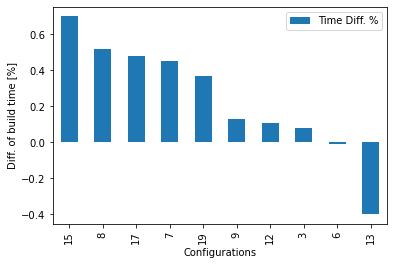

In [8]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = df7[["Branch", "Time Diff. %"]].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("Diff. of build time [%]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig03.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot